# ПРОЕКТ

# Команда Жириновского!!! **самого лучшего, эффектного, грациозного, харизматичного, сексуального, умного, образованного и справедливого политика во всей мировой истории**

<center>
  <img src="https://avatars.dzeninfra.ru/get-zen_doc/271828/pub_6748281035d5373f07d956d4_67482823813949719f6df7bf/smart_crop_516x290" height="200">
  <br>
  КХЭЭЭ  
</center>

<div style="display: flex; justify-content: center; gap: 10px;">
  <a href="https://ibb.co/MxVW1qDW">
    <img src="https://i.ibb.co/21tmMX7m/photo-2025-03-15-22-04-22.jpg" alt="photo-2025-03-15-22-04-22" width="150">
  </a>
  <a href="https://ibb.co/RkHc899z">
    <img src="https://i.ibb.co/dwKDZrrG/photo-2025-03-15-21-49-26.jpg" alt="photo-2025-03-15-21-49-26" width="150">
  </a>
  <a href="https://ibb.co/r2w0J6tM">
    <img src="https://i.ibb.co/yFQPJyR5/photo-2025-03-15-22-19-01.jpg" alt="photo-2025-03-15-22-19-01" width="150">
  </a>
</div>


## Александр Гавриленко
## Дмитрий Палагутин
## Максим Крючков

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser
import os
import matplotlib.dates as mdates

sns.set_style("darkgrid")
sns.set_palette('dark')
pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))


sns.set_style("darkgrid")
sns.set_palette('dark')

data = pd.read_csv('NASDAQ 1962-2024.csv')
data['Date'] = pd.to_datetime(data['Date'])


In [3]:
import warnings
import pandas as pd

# Подавить предупреждения FutureWarning
warnings.filterwarnings('ignore')


# Приводим данные в нормальный вид

In [4]:
### Превращает данные с кегля в норм таблицу

def target_to_table(table, target: str):
    table_pivot = table.pivot(index='Date', columns='Ticker', values=target)
    table_pivot = table_pivot.ffill().bfill()
    return table_pivot

### что бы нормально обрабатывать обьем для индекса sp500
def convert_volume(value):
        if isinstance(value, str):  
            value = value.replace(',', '').strip()
            if 'K' in value:
                return float(value.replace('K', '')) * 1e3
            elif 'M' in value:
                return float(value.replace('M', '')) * 1e6
            elif 'B' in value:
                return float(value.replace('B', '')) * 1e9
            return float(value)
        return value  
### что бы спокойно подгрузить любой csv из инвестинга
def investing2data(path):
    btc = pd.read_csv(path,
    thousands=",",
    quotechar='"',
    parse_dates=["Date"],
    dayfirst=False
    )
    btc['ln(price)'] = np.log(btc['Price'] + 1e-10)
    btc['Change %'] = btc['Change %'].str.rstrip('%').astype(float)
    btc.rename(columns={'Date': 'Date', 'Price': 'price', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Vol.': 'volume', 'Change %': 'change'}, inplace=True)
    btc['volume'] = btc['volume'].apply(convert_volume)
    btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')
    return btc
### что бы окно начиналось с начала а не с конца
def do_flip(dataframe):
    return dataframe.iloc[::-1].reset_index(drop=True)

## Функции которые использовались для анализа


In [5]:
### режет данные по меткам
def do_slice(date1: str, date2: str, btc):
    btc_version = btc[(btc['date'] >= pd.Timestamp(f'{date1}')) & ((btc['date'] <= pd.Timestamp(f'{date2}')))]
    return btc_version

### считает бету за указанный период, между таблицами с одинаковым названием колонки
### бета показывает насоклько сильнее вырастет актив, при росте индекса
def count_beta(data1, data2, ticker1, ticker2, period, date1='2010-07-18', date2='2025-02-10', between='price'):
    data1 = do_slice(date1, date2, data1)
    data2 = do_slice(date1, date2, data2)
    first_date1 = data1.iloc[0]['date']
    second_date1 = data1.iloc[-1]['date']
    if first_date1 > second_date1:
        data1 = do_flip(data1)


    first_date2 = data2.iloc[0]['date']
    second_date2 = data2.iloc[-1]['date']
    if first_date2 > second_date2:
        data2 = do_flip(data2)

    general = pd.merge(data1, data2, 'inner', 'date')
    general = general[['date', f'{between}_x', f'{between}_y']]
    general.rename(columns={f'{between}_x': f'{between} {ticker1}', f'{between}_y' : f'{between} {ticker2}'}, inplace=True)
    general.ffill(inplace=True)
    general[f'rolling_beta for {period} days'] = (general[f'{between} {ticker1}'].rolling(period).cov(general[f'{between} {ticker2}'])) / general[f'{between} {ticker2}'].rolling(period).var()
    return general    
### тоже самое что и выше, но корреляция 
### корреляция показывает насколько движения активов взаимосвязаны
def count_correlation(data1, data2, ticker1, ticker2, period, date1='2010-07-18', date2='2025-02-10', between='price'):
    data1 = do_slice(date1, date2, data1)
    data2 = do_slice(date1, date2, data2)
    first_date1 = data1.iloc[0]['date']
    second_date1 = data1.iloc[-1]['date']
    if first_date1 > second_date1:
        data1 = do_flip(data1)


    first_date2 = data2.iloc[0]['date']
    second_date2 = data2.iloc[-1]['date']
    if first_date2 > second_date2:
        data2 = do_flip(data2)
    general = pd.merge(data1, data2, 'inner', 'date')
    general = general[['date', f'{between}_x', f'{between}_y']]
    general.rename(columns={f'{between}_x': f'{between} {ticker1}', f'{between}_y' : f'{between} {ticker2}'}, inplace=True)
    general.ffill(inplace=True)
    general['rolling correlation '] = general[f'{between} {ticker1}'].rolling(period).corr(general[f'{between} {ticker2}'])
    return general  


### считает какой актив перформит лучше исторически + приводит отношение к единице раз в указанный период
### это нужно для того, что бы если 1 актив слишком вырос за какой то промежуток, начать заново отслеживать их взаимную динамику
### если кеф больше 1, значит перформит лучше актив из 1 ой таблицы, если наоборот то из второй
### P.S по итогу просто помогло в анализе, что бы понимать что происходит, но конкретные результаты не вставили
def count_outperform(btc, dxy, date1, date2, ticker1, ticker2, period, between):
    btc_version = do_slice(date1, date2, btc)
    dxy_version = do_slice(date1, date2, dxy)
    if btc_version.iloc[0]['date'] > btc_version.iloc[-1]['date']:
        btc_version = do_flip(btc_version)
    if dxy_version.iloc[0]['date'] > dxy_version.iloc[-1]['date']:
        dxy_version = do_flip(dxy_version)
    btc_dxy_version = pd.merge(btc_version, dxy_version, 'inner', 'date')
    btc_dxy_version = btc_dxy_version[['date', f'{between}_x', f'{between}_y']]
    btc_dxy_version.rename(columns={
        f'{between}_x': f'{between} {ticker1}', 
        f'{between}_y': f'{between} {ticker2}'
    }, inplace=True)

    btc_dxy_version[f'normalized {between} {ticker1}'] = np.nan
    btc_dxy_version[f'normalized {between} {ticker2}'] = np.nan
    current_date = btc_dxy_version.loc[0, 'date']
    last_date = btc_dxy_version.iloc[-1]['date']
    first = btc_dxy_version[btc_dxy_version['date'] == current_date][f'{between} {ticker1}'].iloc[-1]
    second = btc_dxy_version[btc_dxy_version['date'] == current_date][f'{between} {ticker2}'].iloc[-1]
    current_row_index = btc_dxy_version[btc_dxy_version['date'] == current_date].index[0]
    target_date = btc_dxy_version.iloc[current_row_index + period]['date']
    btc_dxy_version['reset_date'] = np.nan
    while current_date != last_date:
        btc_dxy_version.loc[btc_dxy_version['date'] == current_date, f'normalized {between} {ticker1}'] = (btc_dxy_version.loc[btc_dxy_version['date'] == current_date, f'{between} {ticker1}'].iloc[-1]) / first
        btc_dxy_version.loc[btc_dxy_version['date'] == current_date, f'normalized {between} {ticker2}'] = (btc_dxy_version.loc[btc_dxy_version['date'] == current_date, f'{between} {ticker2}'].iloc[-1]) / second
        current_row_index = btc_dxy_version[btc_dxy_version['date'] == current_date].index[0]
        current_date = btc_dxy_version.iloc[current_row_index + 1]['date']
        if current_date == target_date:
            btc_dxy_version.loc[btc_dxy_version['date'] == current_date, 'reset_date'] = pd.Timestamp(current_date)
            first = btc_dxy_version[btc_dxy_version['date'] == current_date][f'{between} {ticker1}'].iloc[-1]
            second = btc_dxy_version[btc_dxy_version['date'] == current_date][f'{between} {ticker2}'].iloc[-1]
            current_row_index = btc_dxy_version[btc_dxy_version['date'] == current_date].index[0]
            target_row_index = current_row_index + period
            if target_row_index < len(btc_dxy_version):
                target_date = btc_dxy_version.iloc[target_row_index]['date']
            else:
                target_date = last_date
    btc_dxy_version['outperform'] = btc_dxy_version[f'normalized {between} {ticker1}'] / btc_dxy_version[f'normalized {between} {ticker2}']
    return btc_dxy_version

### функция что бы посмотреть на весь датафрейм в браузере
def show(df):
    html_table = df.to_html()
    current_directory = os.getcwd()
    file_path = os.path.join(current_directory, 'table.html')
    with open(file_path, 'w') as file:
        file.write(html_table)
    webbrowser.open(f'file://{file_path}')

In [6]:
data_price = target_to_table(table=data, target='Close')
sp500 = investing2data(path='S&P 500 Historical Data.csv')
data_price = data_price.drop(columns=[data_price.columns[0]]) ### в первой колонке был NaN 
data_price_sp500 = pd.merge(data_price, sp500, 'inner', 'Date')
data_price_sp500

,Date,AACG,AACI,AADI,AAGR,AAL,AAME,AAOI,AAON,AAPL,...,ZVSA,ZYME,ZYXI,price,open,high,low,volume,change,ln(price)
0,2014-01-02,3.9400,9.7500,67.5000,7.0251,25.3600,3.9800,14.6300,14.0844,19.7546,...,"3,447.5000",13.0000,0.3273,"1,832.0000","1,845.9000","1,845.9000","1,827.7000",NaN,-0.8900,7.5132
1,2014-01-03,3.9300,9.7500,67.5000,7.0251,26.5400,4.0700,14.3500,14.0800,19.3207,...,"3,447.5000",13.0000,0.3273,"1,831.4000","1,833.2000","1,838.2000","1,829.1000",NaN,-0.0300,7.5128
2,2014-01-06,3.9400,9.7500,67.5000,7.0251,27.0300,4.0300,14.3300,13.8533,19.4261,...,"3,447.5000",13.0000,0.3182,"1,826.8000","1,832.3000","1,837.2000","1,823.7000",NaN,-0.2500,7.5103
3,2014-01-07,4.0100,9.7500,67.5000,7.0251,26.9100,4.0400,14.7400,14.0533,19.2871,...,"3,447.5000",13.0000,0.3364,"1,837.9000","1,828.7000","1,840.1000","1,828.7000",NaN,0.6100,7.5164
4,2014-01-08,4.0500,9.7500,67.5000,7.0251,27.6300,4.0100,14.6600,14.1156,19.4093,...,"3,447.5000",13.0000,0.3545,"1,837.5000","1,837.9000","1,840.0000","1,831.4000",NaN,-0.0200,7.5162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,2024-05-16,0.9100,11.3500,1.9150,0.3840,14.7900,1.7100,11.2300,74.8600,189.8400,...,4.8600,9.3800,11.0000,"5,297.1000","5,310.0700","5,325.4900","5,296.1900",NaN,-0.2100,8.5749
2611,2024-05-17,0.9100,11.4600,1.9100,0.3700,14.7300,1.7100,11.7250,74.8800,189.8700,...,4.4870,9.1200,10.8800,"5,303.2700","5,303.1000","5,305.4500","5,283.5900",NaN,0.1200,8.5761
2612,2024-05-20,0.9100,11.4000,1.8600,0.3450,14.5200,1.6400,12.4000,74.9800,191.0400,...,4.2000,8.9800,10.5600,"5,308.1300","5,305.3500","5,325.3200","5,302.4000",NaN,0.0900,8.5770
2613,2024-05-21,0.9500,11.4870,1.8500,0.3520,14.0300,1.7400,12.0000,76.7900,192.3500,...,4.4000,8.9100,10.5800,"5,321.4100","5,298.6900","5,324.3200","5,297.8700",NaN,0.2500,8.5795


In [7]:
# ПАРСИМ ВИКПЕДИЮ чобы достать сектора для крупнеших компаний (80% всей капитализации на рынке)
# URL страницы Wikipedia с составом S&P 500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
# Чтение таблиц с страницы
tables = pd.read_html(url)
# Первая таблица содержит список компаний
sp500_table = tables[0]
df_sector=sp500_table[['Symbol','GICS Sector']]
df_sector

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,XYL,Industrials
499,YUM,Consumer Discretionary
500,ZBRA,Information Technology
501,ZBH,Health Care


In [8]:
len(set(df_sector['Symbol'])&set(data_price_sp500.columns))

151

In [9]:
df_filtered_sector = df_sector[df_sector['Symbol'].isin(data_price_sp500.columns)]
df_filtered_sector

,Symbol,GICS Sector
5,ADBE,Information Technology
6,AMD,Information Technology
11,ABNB,Consumer Discretionary
12,AKAM,Information Technology
15,ALGN,Health Care
...,...,...
494,WTW,Financials
495,WDAY,Information Technology
496,WYNN,Consumer Discretionary
497,XEL,Utilities


получился датафрейм с 151 компанией, для которых мы знаем сектор (я пытался разными способами еще найти инфы, но зачастую доступ платный и нельзя все нормально выгрузить(((). Далее будем пытаться как-то расширить этот список вручную или с помощью корреляции.

## S&P-500 и бета

In [10]:
data=data_price_sp500

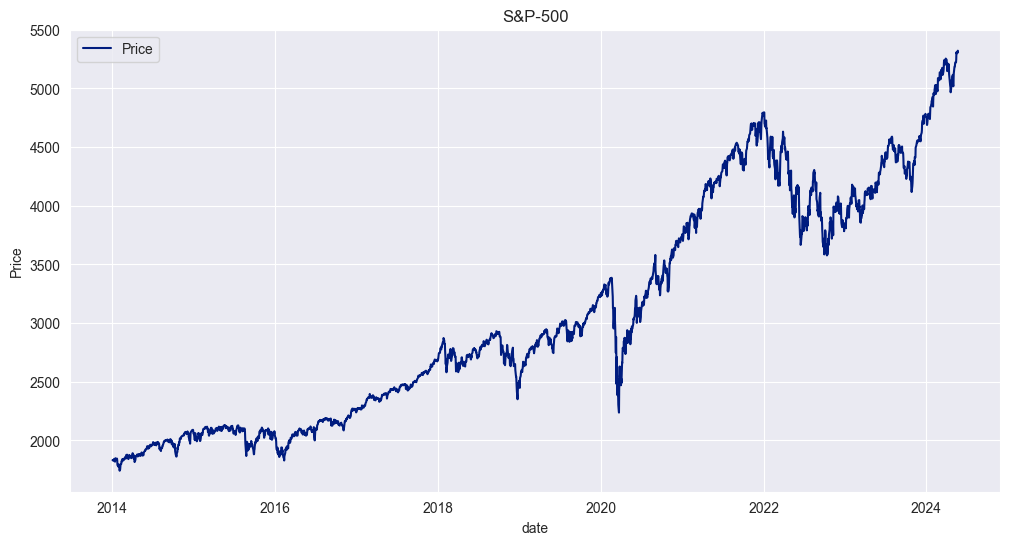

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['price'], label='Price')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('S&P-500')
plt.legend()
plt.show()

Динамика роста S&P-500. Факты - 
1) S&P-500 - взвешенная по капитализации стоимость 500 крупнейшних американских компаний. Вес каждой компании = (капитализация компании)/(сумма капитализаций всех компаний в индексе).
2) c 2014 по 2015 года индекс вырос в 2.2 раза
3) на графике динамики индекса явно выражены кризис связанный с эпидемией covid-19 и кризис 2022-2024 (видимо, геополитика)


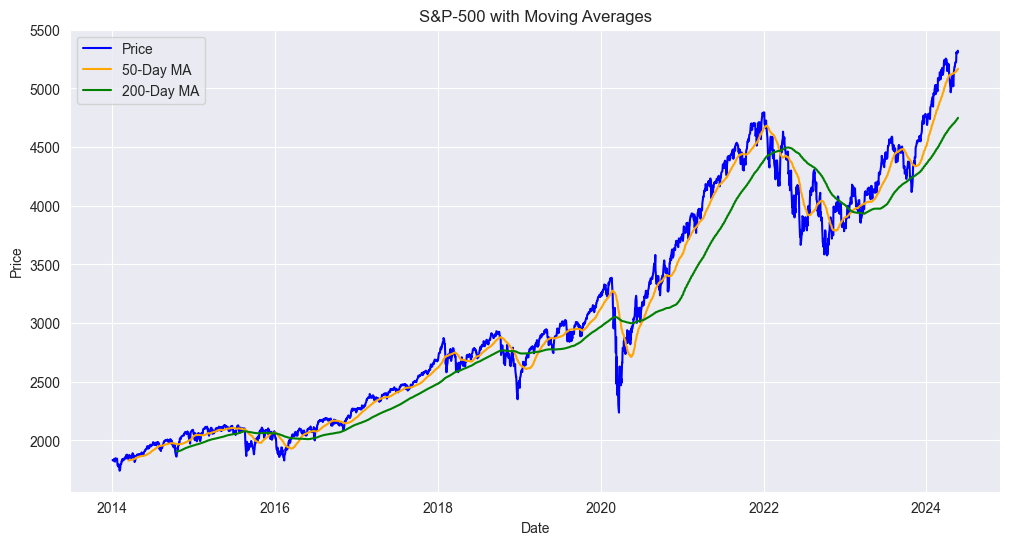

In [12]:

data['MA_50'] = data['price'].rolling(window=50).mean()
data['MA_200'] = data['price'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['price'], label='Price', color='blue')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', color='orange')
plt.plot(data['Date'], data['MA_200'], label='200-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P-500 with Moving Averages')
plt.legend()
plt.show()

Скользящая средняя сглаживает краткосрочные колебания и явно отражает основные циклы и тренды

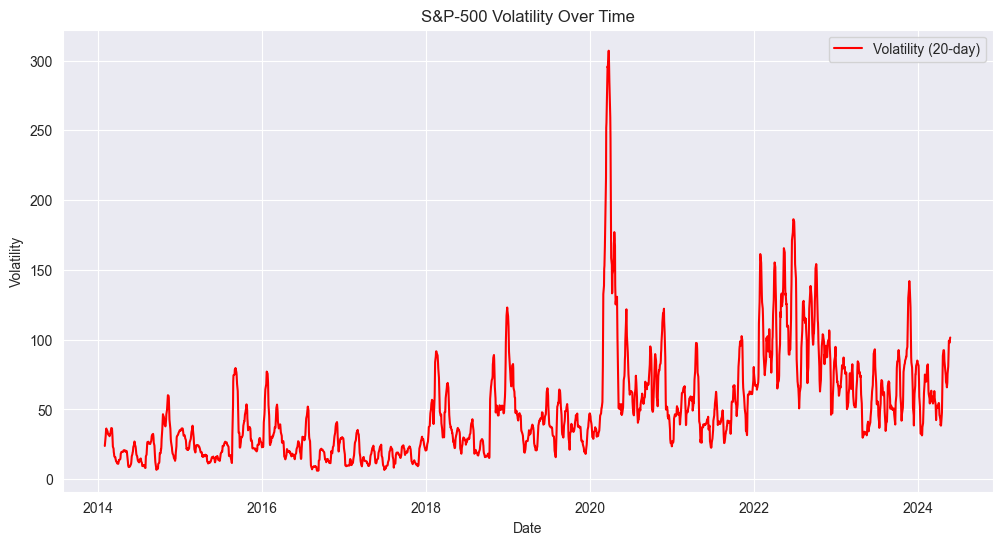

In [13]:

window = 20 
data['Volatility'] = data['price'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volatility'], label='Volatility (20-day)', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('S&P-500 Volatility Over Time')
plt.legend()
plt.grid(True)
plt.show()

Высокие значения волатильности указывают на периоды высокой нестабильности цен, а низкие значения — на периоды стабильности. Как мы видим - периоду 2020-2024 харакетрны скачки волатильности, что говорит об экономической неустойчивости в это время

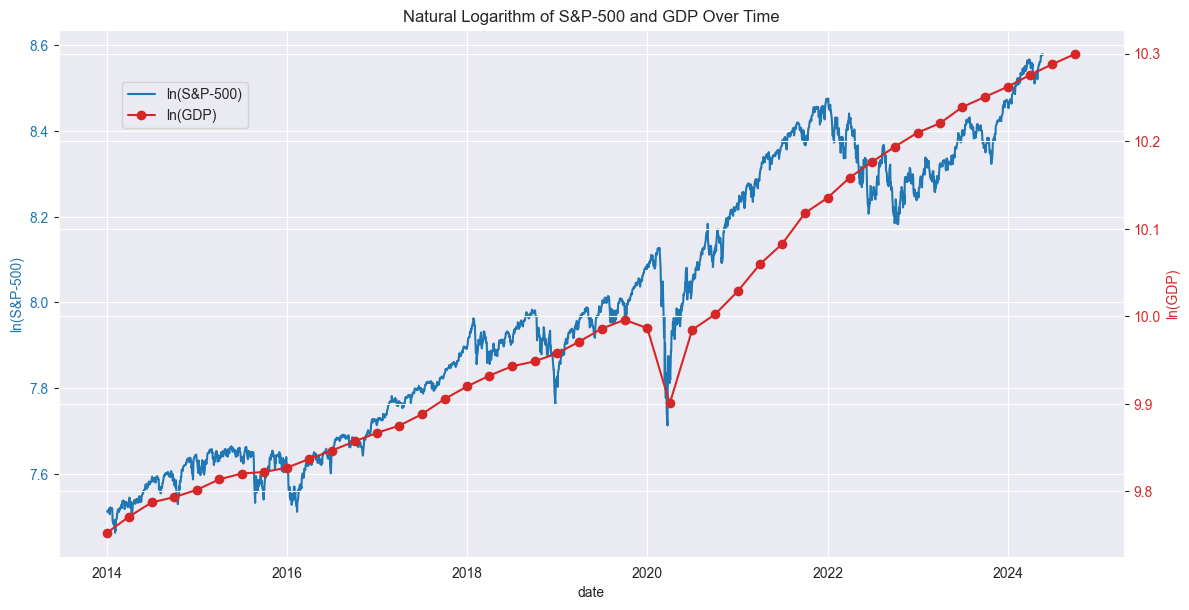

Correlation between ln(S&P-500) and ln(GDP): 0.97


In [14]:
GDP = pd.read_csv('GDP.csv')


GDP['observation_date'] = pd.to_datetime(GDP['observation_date'])

data['date'] = pd.to_datetime(data['Date'])

data['ln_price'] = np.log(data['price'])
GDP['ln_GDP'] = np.log(GDP['GDP'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('ln(S&P-500)', color=color)
ax1.plot(data['date'], data['ln_price'], color=color, label='ln(S&P-500)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ln(GDP)', color=color)
ax2.plot(GDP['observation_date'], GDP['ln_GDP'], color=color, label='ln(GDP)', marker='o')  # Маркеры для точек ВВП
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Natural Logarithm of S&P-500 and GDP Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.xticks(rotation=45)  # Поворот меток для лучшей читаемости
plt.show()


merged_data = pd.merge(data, GDP, left_on='date', right_on='observation_date', how='inner')
correlation = merged_data['ln_price'].corr(merged_data['ln_GDP'])
print(f"Correlation between ln(S&P-500) and ln(GDP): {correlation:.2f}")

График сравнивает ВВП США и S@P-500. Интересный момент  - с 2022 по 2024 S@P-500 падает, ВВП растет, что указывает что кризис был в финансовом секторе и он не отразился на производстве

In [15]:
data.describe()

,Date,AACG,AACI,AADI,AAGR,AAL,AAME,AAOI,AAON,AAPL,...,high,low,volume,change,ln(price),MA_50,MA_200,Volatility,date,ln_price
count,2615,"2,615.0000","2,615.0000","2,615.0000","2,615.0000","2,615.0000","2,615.0000","2,615.0000","2,615.0000","2,615.0000",...,"2,615.0000","2,615.0000",0.0000,"2,615.0000","2,615.0000","2,566.0000","2,416.0000","2,596.0000",2615,"2,615.0000"
mean,2019-03-12 21:41:13.881453312,2.9292,9.8803,39.2286,6.7868,30.2631,3.1470,17.4147,32.8225,81.7702,...,"3,099.3798","3,065.3357",NaN,0.0465,7.9854,"3,075.5813","3,057.1650",49.0586,2019-03-12 21:41:13.881453312,7.9854
min,2014-01-02 00:00:00,0.6700,9.3400,1.5900,0.3000,9.0400,1.5000,1.5000,11.3133,17.8493,...,"1,755.8000","1,737.9000",NaN,-11.9800,7.4627,"1,828.8460","1,905.7500",5.9948,2014-01-02 00:00:00,7.4627
25%,2016-08-06 12:00:00,1.3100,9.7500,13.1300,7.0251,16.2350,2.4500,8.4500,18.5467,30.4775,...,"2,148.8000","2,131.6500",NaN,-0.3800,7.6683,"2,152.9530","2,196.1472",22.8034,2016-08-06 12:00:00,7.6683
50%,2019-03-14 00:00:00,2.6300,9.7500,30.7500,7.0251,31.8000,3.2000,12.7200,28.5467,50.4375,...,"2,845.6000","2,817.4000",NaN,0.0600,7.9492,"2,838.9910","2,790.5710",39.0345,2019-03-14 00:00:00,7.9492
75%,2021-10-14 12:00:00,4.4400,9.7500,67.5000,7.0251,41.9050,3.8800,20.5350,42.4733,142.5450,...,"4,014.7650","3,953.2850",NaN,0.5700,8.2902,"3,981.6925","3,975.9488",64.9014,2021-10-14 12:00:00,8.2902
max,2024-05-22 00:00:00,14.3000,11.9800,75.0000,7.7728,58.4700,6.5300,99.6100,94.4700,198.1100,...,"5,325.4900","5,302.4000",NaN,9.3800,8.5795,"5,167.5402","4,749.6906",307.0460,2024-05-22 00:00:00,8.5795
std,NaN,1.6340,0.3326,26.3686,1.3140,13.5162,0.8457,15.2794,17.4714,58.4906,...,972.8637,961.2164,NaN,1.1047,0.3106,942.2138,881.1887,37.2995,NaN,0.3106


## Наивная гипотеза


Предположим, мы верим, что американский рынок акций в долгосрочной перспективе будет расти. Но вместо того, чтобы просто инвестировать в S&P500, мы хотим взять на себя немного больший риск и получить более высокую доходность.

#### Что нужно сделать:

Нужно найти такие акции, которые:
1. **Сильно коррелируют с S&P500**, т.е. их цена обычно движется вместе с рынком.
2. **Имеют высокий бета-коэффициент**, что означает, что они более волатильны (т.е. могут расти быстрее).

### Почему выбираем корреляцию и бета?

1. **Корреляция с S&P500** помогает найти акции, которые следуют за движением рынка. Высокая корреляция гарантирует, что эти акции будут расти, если рынок растет.
   
2. **Бета-коэффициент** — это мера того, насколько акция изменяется по сравнению с рынком. Высокий бета значит, что акция будет сильно колебаться, что дает возможность получить больше прибыли, если рынок растет.

### Как действуем:

1. **Рассчитываем корреляцию** акций с S&P500, чтобы выбрать те, которые "следуют" за рынком.
2. **Считаем бета-коэффициент**, чтобы понять, насколько акция будет волатильной по сравнению с S&P500.
3. **Выбираем акции** которые попали в оба топа.

### Почему эт должно работать?

Корреляция поможет нам выбрать акции, которые растут с рынком, а бета-коэффициент даст шанс на более высокую доходность, если рынок будет расти.


In [16]:
sp500.rename(columns={'Date': 'date'}, inplace=True)
corr_data = pd.DataFrame(columns=['Ticker', 'Average Correlation'])

for column_name in data_price.columns:
    pre_result = data_price[[column_name]].reset_index()
    pre_result.rename(columns={column_name: 'price', 'Date': 'date'}, inplace=True)
    corr_sample = count_correlation(sp500, pre_result, column_name, 'spx500', 220, '2018-01-01', '2023-05-22', between='price') ## берем c 18 года, что бы отслеживать относительно новые тренды
    corr_data[column_name] = corr_sample['rolling correlation ']

corr_data.drop(columns=['Ticker', 'Average Correlation'], inplace=True)
corr_data.replace([np.inf, -np.inf], 0, inplace=True)
mean_values = corr_data.mean()
corr_top_100 = mean_values.sort_values(ascending=False).head(300)

In [17]:
beta_data = pd.DataFrame(columns=['Ticker', 'Average beta'])

for column_name in data_price.columns:
    pre_result = data_price[[column_name]].reset_index()
    pre_result.rename(columns={column_name: 'price', 'Date': 'date'}, inplace=True)
    beta_sample = count_beta(sp500, pre_result, column_name, 'spx500', 220, '2018-01-01', '2023-05-22', between='price')
    beta_data[column_name] = beta_sample['rolling_beta for 220 days']

beta_data.drop(columns=['Ticker', 'Average beta'], inplace=True)
beta_data.replace([np.inf, -np.inf], 0, inplace=True)
mean_values2 = beta_data.mean()
beta_top_100 = mean_values2.sort_values(ascending=False).head(300)

In [18]:
result = corr_top_100.index.intersection(beta_top_100.index)
print(f'Finally have {len(result)} stocks in portfolio')
print(*result, sep=', ')

Finally have 26 stocks in portfolio
OCSL, MGIC, ARCC, BANX, GAIN, NMFC, NOTV, PCYO, FMNB, LTRX, SLRC, STKS, HRZN, THRY, PSEC, HONE, BOTJ, GBDC, WSBF, VLY, TURN, WHF, PDLB, SANG, FRST, MRBK


Таким образом, нам удалось выбрать **26** (неплохая диверсификация) бумаг, в которые стоит проинвестировать, исходя из нашей гипотезы.

Теперь давайте проверим, что случилось бы с нашими средствами, если бы мы вложились в эти бумаги.

Для начала, посмотрим, как за последний год изменялся сам **S&P500**.


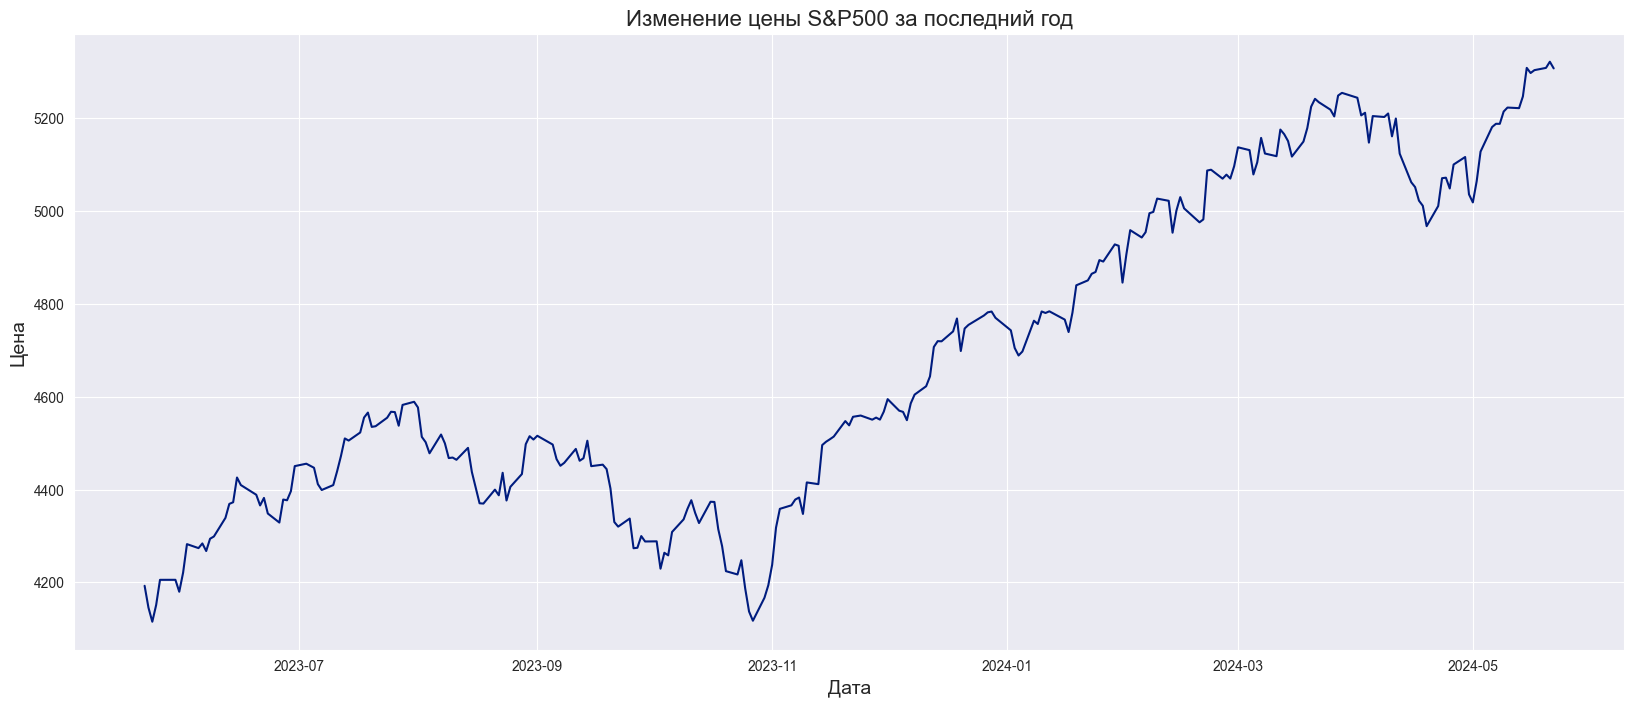

In [19]:
plt.figure(figsize=(20, 8))

sp500_last_year = sp500.copy()
sp500_last_year = do_slice('2023-05-22', '2024-05-22', sp500_last_year)

sns.lineplot(sp500_last_year, x='date', y='price')

plt.title('Изменение цены S&P500 за последний год', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Цена', fontsize=14)

plt.show()


Мы составили портфель из **26 акций**, в которые решили инвестировать. Для простоты расчета, вложим по **10,000 долларов** в каждую акцию. Это означает, что в сам индекс **S&P500** будет инвестировано **260,000 долларов**.

Теперь давайте посмотрим, как бы выглядели результаты, если бы мы действительно вложились в эти **26 акций**. Сравним, что оказалось бы выгоднее — инвестирование в наш **портфель** или в сам **S&P500**.


In [20]:
first_date = sp500_last_year.iloc[-1]['date']
last_date = sp500_last_year.iloc[0]['date']
sp500_quan = (260000 / (sp500[sp500['date'] == first_date]['price'])).iloc[0] ## для чистоты эксперимента будем считать, что бумаги абсолютно делимы
sp_500_last_date_price = (sp500[sp500['date'] == last_date]['price']).iloc[0]
sp_500_portfolio = sp500_quan * sp_500_last_date_price
print(f'New portfolio assets price {np.round(sp_500_portfolio, 2)}')
print(f'Therefore portfolio yield is equal to {np.round(100 * (sp_500_portfolio - 260000) / 260000, 2)}%')

New portfolio assets price 329106.69
Therefore portfolio yield is equal to 26.58%


Отлично, теперь сравним это относительно инвестирования в выбранные бумаги.

Для начала, посмотрим на все эти графики, что бы убедиться что не было дробления или консолидации(просто eye test)

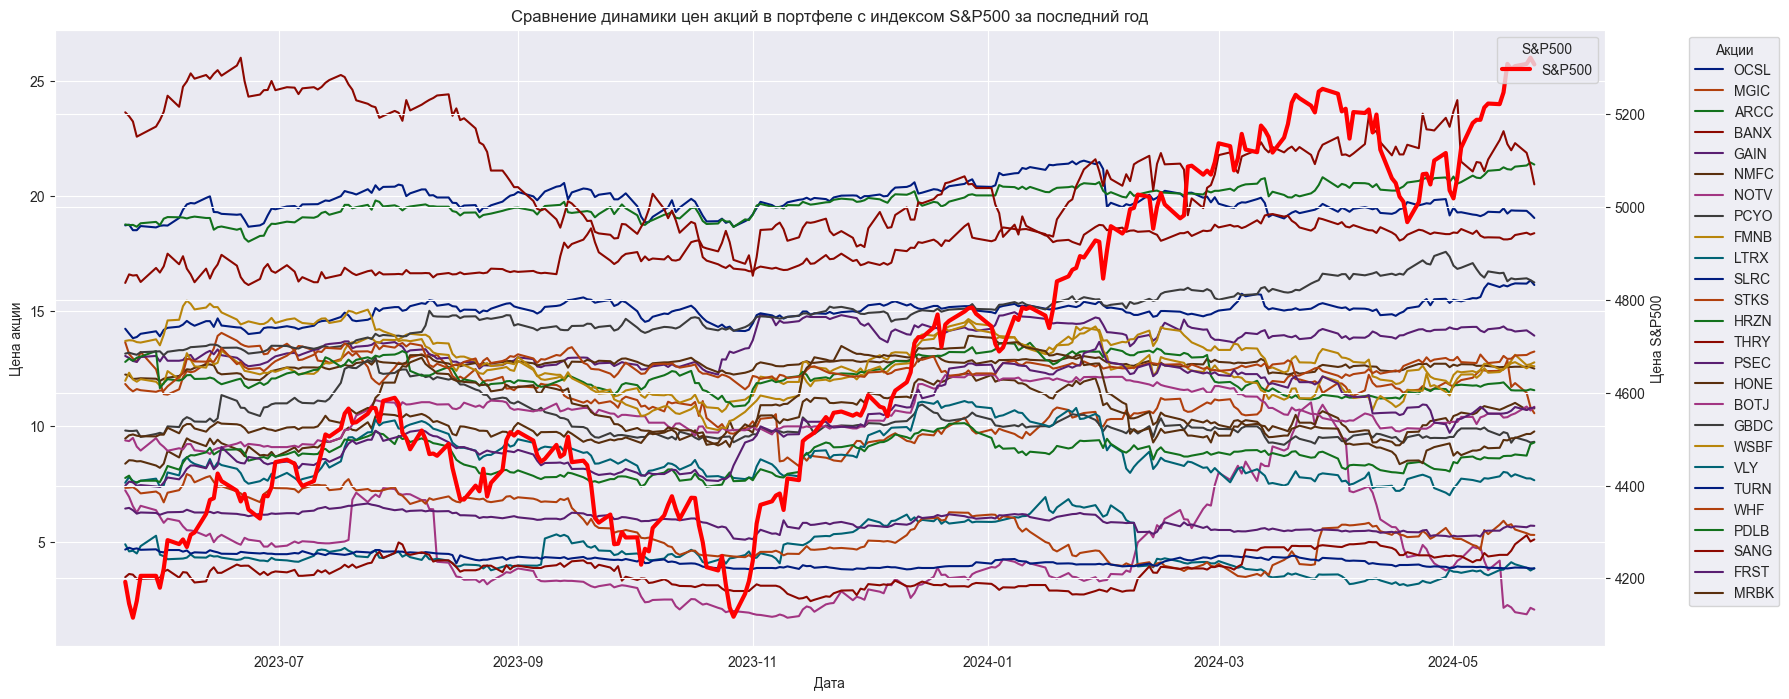

In [20]:
fig, ax1 = plt.subplots(figsize=(20, 8))

data_price_sample = data_price_sp500.copy()
data_price_sample.rename(columns={'Date': 'date'}, inplace=True)
data_price_sample = do_slice('2023-05-22', '2024-05-22', data_price_sample)

sp500_sample = sp500.copy()
sp500_sample.rename(columns={'Date': 'date'}, inplace=True)
sp500_sample = do_slice('2023-05-22', '2024-05-22', sp500_sample)

for share in result:
    sns.lineplot(data=data_price_sample, x='date', y=share, ax=ax1, label=share)

ax2 = ax1.twinx()
sns.lineplot(data=sp500_sample, x='date', y='price', ax=ax2, color='red', linewidth=3, label='S&P500')

plt.title('Сравнение динамики цен акций в портфеле с индексом S&P500 за последний год')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Цена акции')
ax2.set_ylabel('Цена S&P500')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, title='Акции', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title='S&P500', loc='upper right')

plt.show()


Как видно, **резких взлетов или падений цен нет** (особенно тех, что не согласовывались с остальными линиями). Это говорит о том, что **с высокой долей вероятности можно утверждать**, что **дробления или консолидации не имели места**.


In [24]:
shares_portfolio = 0
check = 0
for share in result:
    first_price = data_price[data_price.index == first_date][share].iloc[0]
    shares_quantity = 10000 / first_price
    last_price = data_price[data_price.index == last_date][share].iloc[0]
    profit = shares_quantity * last_price
    check += 10000
    shares_portfolio += profit
print(f'New portfolio assets price {np.round(shares_portfolio, 2)}')
print(f'Therefore portfolio yield is equal to {np.round(100 * (shares_portfolio - 260000) / 260000, 2)}%')

New portfolio assets price 264640.13
Therefore portfolio yield is equal to 1.78%


Как видим, **казалось бы логичная стратегия** по поиску наиболее скоррелированных бумаг, которые должны показать более быстрый рост, на практике провалилась.  
В то время как **S&P 500** показал потрясающую доходность **25%+**, наша стратегия принесла всего **1.78% годовых**.


### С чем может быть связан данный ошеломляющий результат?

**Первая идея**, которая приходит в голову, — это то, что **изменилась корзина акций**. Возможно, текущий портфель содержит другие компании, которые не показывают ожидаемой доходности.

Чтобы проверить это, давайте сравним **акции, которые мы купили** в первый раз, с теми, которые были отобраны **по новой методике** за последний год. Мы выберем те бумаги, которые показывают высокую **корреляцию с индексом S&P500** и имеют высокий **бета-коэффициент**.

Далее, мы узнаем, сколько **компаний** из первоначального портфеля остались в новом списке. Это поможет понять, насколько сильно изменился состав нашего портфеля и может объяснить **результаты**.


In [25]:
print(f'Finally have {len(result)} stocks in portfolio')
print(*result, sep=', ')

corr_data = pd.DataFrame(columns=['Ticker', 'Average Correlation'])

for column_name in data_price.columns:
    pre_result = data_price[[column_name]].reset_index()
    pre_result.rename(columns={column_name: 'price', 'Date': 'date'}, inplace=True)
    corr_sample = count_correlation(sp500, pre_result, column_name, 'spx500', 220, '2023-05-22', '2024-05-22', between='price') ## берем c 18 года, что бы отслеживать относительно новые тренды
    corr_data[column_name] = corr_sample['rolling correlation ']

corr_data.drop(columns=['Ticker', 'Average Correlation'], inplace=True)
corr_data.replace([np.inf, -np.inf], 0, inplace=True)
mean_values = corr_data.mean()
corr_top_100 = mean_values.sort_values(ascending=False).head(300)

beta_data = pd.DataFrame(columns=['Ticker', 'Average beta'])

for column_name in data_price.columns:
    pre_result = data_price[[column_name]].reset_index()
    pre_result.rename(columns={column_name: 'price', 'Date': 'date'}, inplace=True)
    beta_sample = count_beta(sp500, pre_result, column_name, 'spx500', 220, '2023-05-22', '2024-05-22', between='price')
    beta_data[column_name] = beta_sample['rolling_beta for 220 days']

beta_data.drop(columns=['Ticker', 'Average beta'], inplace=True)
beta_data.replace([np.inf, -np.inf], 0, inplace=True)
mean_values2 = beta_data.mean()
beta_top_100 = mean_values2.sort_values(ascending=False).head(300)

result2 = corr_top_100.index.intersection(beta_top_100.index)
print(f'Finally have {len(result2)} stocks in portfolio')
print(*result2, sep=', ')

Finally have 26 stocks in portfolio
OCSL, MGIC, ARCC, BANX, GAIN, NMFC, NOTV, PCYO, FMNB, LTRX, SLRC, STKS, HRZN, THRY, PSEC, HONE, BOTJ, GBDC, WSBF, VLY, TURN, WHF, PDLB, SANG, FRST, MRBK
Finally have 28 stocks in portfolio
SPKL, HRTX, ADTH, CRNT, ESHA, GLAC, AEAE, NNAG, AITR, CGEN, BRKH, ADV, QETA, GBBK, NHTC, CLOE, DIBS, SVRA, LIBY, PFTA, TALK, BOWN, NETD, ANSC, AFAR, KVAC, GODN, NSTS


In [26]:
same_shares = result.intersection(result2)
print(f'Таким образом осталось {len(same_shares)} компаний из первоначального портфеля')


Таким образом осталось 0 компаний из первоначального портфеля


# Вывод

На практике это означает, что нужно **намного тщательнее анализировать бумаги** и их доходности, а в этом может помочь **анализ цен и их распределений**.

# Как распределены доходности акций?

Для начала хотелось бы понять имеют ли данные нормальное распредление. Выдвинем гипитезу о том, что доходность имеет нормальное распределение. Информация об этом поможет нам в будущем.
Итак, проверим это

In [27]:
df=data_price_sp500
prices_df = df.loc[:, 'AACG':'ZYXI'] #оставляю только цены акций без инфы про S&P-500
df_r=(prices_df.diff()/prices_df.shift(1)).iloc[1:] # получили таблицу с доходностями
df_r

,AACG,AACI,AADI,AAGR,AAL,AAME,AAOI,AAON,AAPL,ABAT,...,ZOOZ,ZPTA,ZS,ZTEK,ZUMZ,ZURA,ZVRA,ZVSA,ZYME,ZYXI
1,-0.0025,0.0000,0.0000,0.0000,0.0465,0.0226,-0.0191,-0.0003,-0.0220,0.0000,...,0.0000,0.0000,0.0000,0.0337,-0.0023,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0025,0.0000,0.0000,0.0000,0.0185,-0.0098,-0.0014,-0.0161,0.0055,0.0000,...,0.0000,0.0000,0.0000,-0.0047,-0.0057,0.0000,0.0000,0.0000,0.0000,-0.0278
3,0.0178,0.0000,0.0000,0.0000,-0.0044,0.0025,0.0286,0.0144,-0.0072,0.0000,...,0.0000,0.0000,0.0000,-0.0654,0.0231,0.0000,0.0000,0.0000,0.0000,0.0571
4,0.0100,0.0000,0.0000,0.0000,0.0268,-0.0074,-0.0054,0.0044,0.0063,0.0000,...,0.0000,0.0000,0.0000,-0.0250,-0.0158,0.0000,0.0000,0.0000,0.0000,0.0541
5,-0.0123,0.0000,0.0000,0.0000,0.0648,0.0050,-0.0341,-0.0060,-0.0128,0.0000,...,0.0000,0.0000,0.0000,-0.0308,-0.0756,0.0000,0.0000,0.0000,0.0000,-0.1282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,-0.0215,-0.0018,0.0408,0.0240,-0.0100,-0.0284,0.0200,-0.0127,0.0006,0.0153,...,-0.1269,-0.0700,-0.0100,0.0263,0.0165,0.1561,-0.0124,-0.0162,0.0251,-0.0009
2611,0.0000,0.0097,-0.0026,-0.0365,-0.0041,0.0000,0.0441,0.0003,0.0002,0.1353,...,0.0749,-0.0215,-0.0025,-0.0171,-0.0081,0.0083,-0.0063,-0.0767,-0.0277,-0.0109
2612,0.0000,-0.0052,-0.0262,-0.0676,-0.0143,-0.0409,0.0576,0.0013,0.0062,-0.0596,...,-0.0492,-0.0923,0.0097,0.0087,-0.0038,-0.0099,-0.0085,-0.0640,-0.0154,-0.0294
2613,0.0440,0.0076,-0.0054,0.0203,-0.0337,0.0610,-0.0323,0.0241,0.0069,0.0000,...,-0.0388,0.0630,-0.0200,-0.0345,0.0088,-0.0818,-0.0149,0.0476,-0.0078,0.0019


In [28]:
df_cleaned = df_r.replace([np.inf, -np.inf], np.nan).dropna() #очищаем от всякой гадости таблицу - где-то доходности могут быть бесконечными из-за того, что акции сплитовались



Посмотрим на распределение доходностей. Поставим гипотезу, что распределение доходностей по акциям является нормальным. Используя тест Шапиро-Уилка проверим, у скольки акций в таблице доходность имеет нормальное распределение

In [29]:
from scipy.stats import shapiro

# Инициализируем счетчик для акций с нормальным распределением
normal_distribution_count = 0

# Уровень значимости (alpha). Если p-значение > 0.05, распределение считается нормальным.
alpha = 0.05

# Проходим по всем столбцам (акциям) в DataFrame
for column in df_cleaned.columns:
    # Убираем NaN значения
    returns = df[column].dropna()
    
    # Проводим тест Шапиро-Уилка
    stat, p = shapiro(returns)
    
    # Проверяем, является ли распределение нормальным
    if p > alpha:
        normal_distribution_count += 1

# Выводим общее количество акций с нормальным распределением
print(f'\nВсего акций с нормальным распределением: {normal_distribution_count} из {len(df.columns)}')


Всего акций с нормальным распределением: 0 из 3383


К сожалению, ни одного нормального распределения не получилось. Может быть появятся, если посмотреть на логарифмы доходностей?

In [30]:
log_returns = np.log(1 + returns)


# Инициализируем счетчик для акций с нормальным распределением
normal_distribution_count = 0

# Уровень значимости (alpha). Если p-значение > 0.05, распределение считается нормальным.
alpha = 0.05

# Проходим по всем столбцам (акциям) в DataFrame
for column in df_cleaned.columns:
    # Убираем NaN значения
    returns = df_cleaned[column].dropna()
    
    # Проводим тест Шапиро-Уилка
    stat, p = shapiro(log_returns)
    
    # Проверяем, является ли распределение нормальным
    if p > alpha:
        normal_distribution_count += 1


# Выводим общее количество акций с нормальным распределением
print(f'\nВсего акций с нормальным распределением, с учетом логарифмирования: {normal_distribution_count} из {len(df.columns)}')


Всего акций с нормальным распределением, с учетом логарифмирования: 0 из 3383


Выходит, что данные не имеют нормального распредления и наша гипотеза отвергается.

Дополнительно рассмотрим распределены ли доходности иным образом:

Может быть стоит взять распределение с более тяжелыми хвостами, например Стьюдента? Используем метод максимального правдоподобия (MLE) для подгонки параметров распределения Стьюдента к данным.

In [33]:

from scipy.stats import t, kstest


# Уровень значимости
alpha = 0.05

# Счётчик для акций с распределением Стьюдента
t_distribution_count = 0



# Проходим по всем столбцам
for column in df_cleaned.columns:
    # Убираем NaN значения
    returns = df_cleaned[column].dropna()
    
    # Подгонка распределения Стьюдента методом максимального правдоподобия
    df_t, loc_t, scale_t = t.fit(returns, method='MLE')  # df_t - degrees of freedom (степени свободы)
    
    # Проверка качества подгонки с помощью критерия Колмогорова-Смирнова
    stat, p = kstest(returns, 't', args=(df_t, loc_t, scale_t))
    
    # Проверяем, соответствует ли распределение Стьюдента
    if p > alpha:
        t_distribution_count += 1
    
# Выводим общее количество акций с распределением Стьюдента
print(f'\nВсего акций с распределением Стьюдента: {t_distribution_count} из {len(df.columns)}')




Всего акций с распределением Стьюдента: 889 из 3383


Вооооот, уже неплохо! Оказывается, что четверть доходностей всех акций можно описать распределением Стьюдента! Кажется, что хвосты доходностей тяжелее нормального, поработаем с ними. Во первых, потыкаемся на картинки Q-Q plot для доходностей разных акций. Увидем, насколько хвосты различаются от нормального распределения 

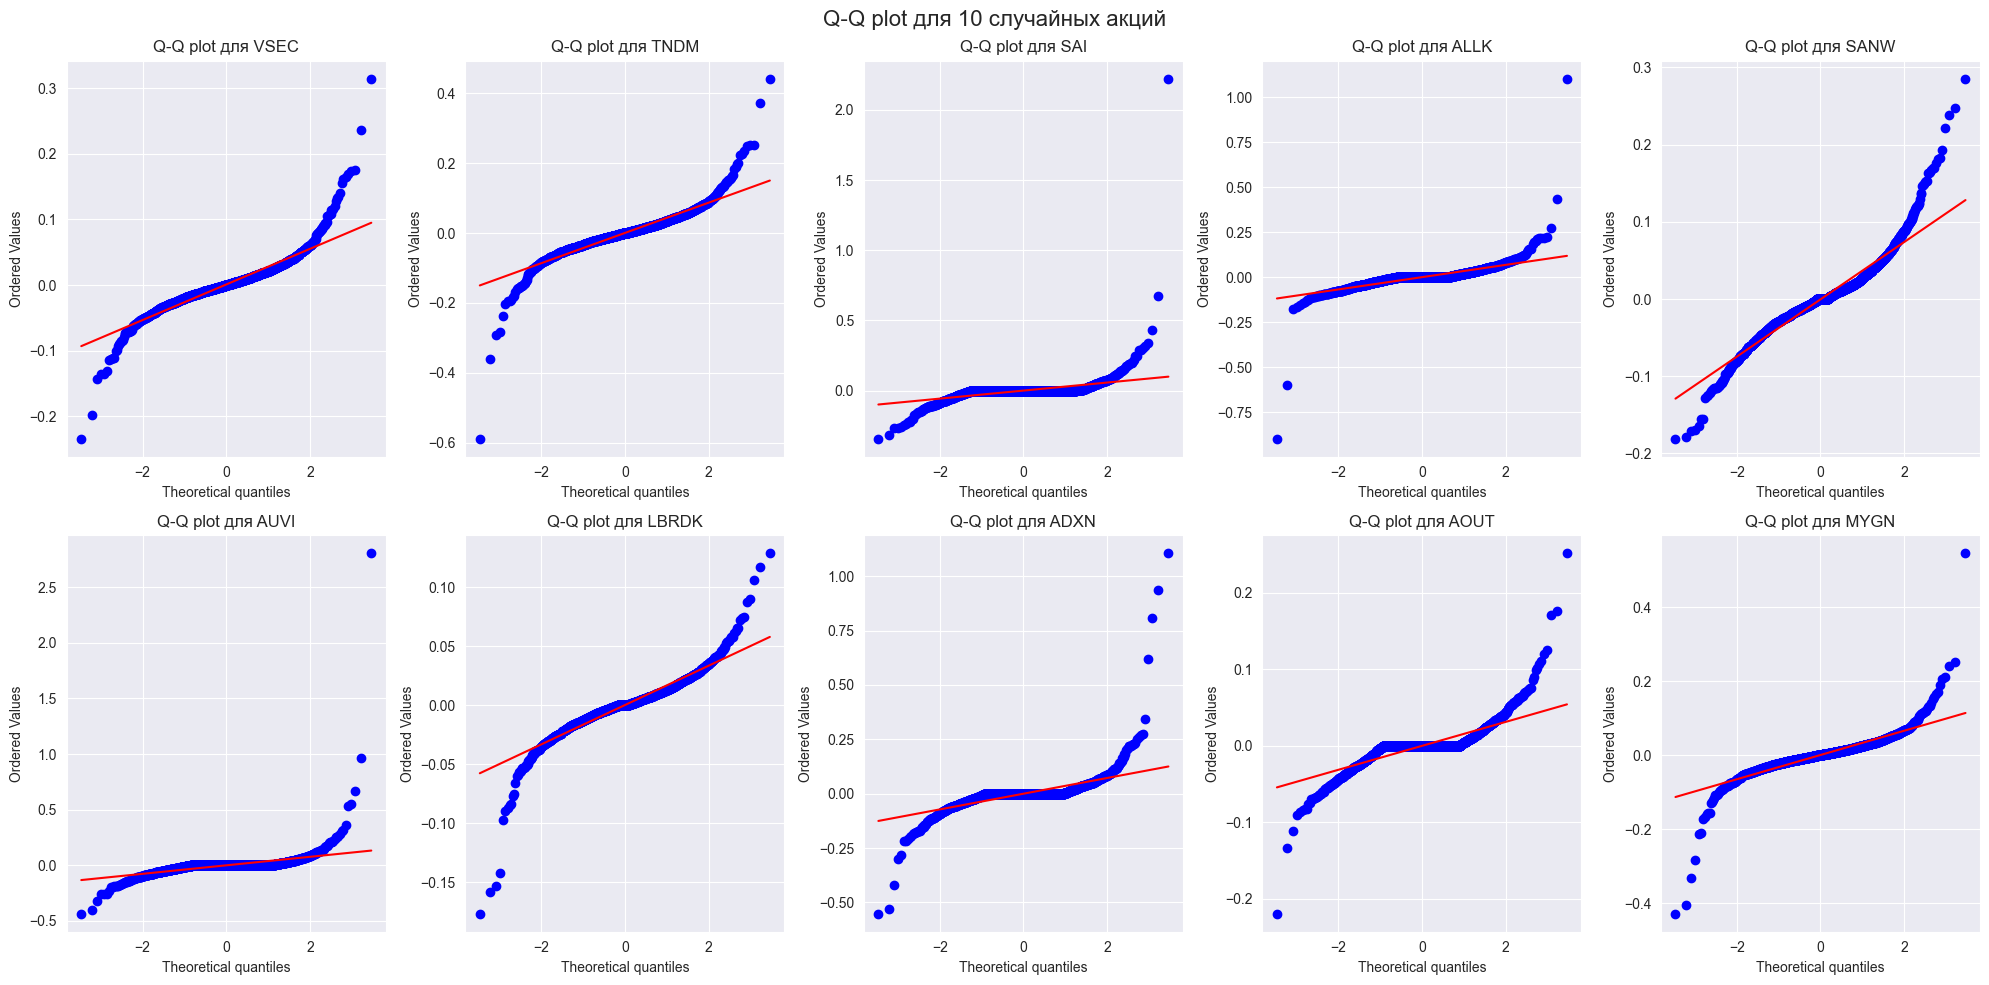

In [34]:
from scipy.stats import probplot

# Выбор 10 случайных акций
np.random.seed(42)  # Для воспроизводимости
random_columns = np.random.choice(df_cleaned.columns, size=10, replace=False)

# Создание сетки подграфиков
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 строки, 5 столбцов
axes = axes.flatten()  # Преобразуем в одномерный массив для удобства

# Построение Q-Q plot для каждой акции
for i, column in enumerate(random_columns):
    # Убираем NaN значения
    returns = df_cleaned[column].dropna()
    
    # Построение Q-Q plot
    probplot(returns, dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot для {column}')
    axes[i].grid(True)

# Убираем лишние подграфики, если их меньше 10
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Настройка общего заголовка и отображение
plt.suptitle('Q-Q plot для 10 случайных акций', fontsize=16)
plt.tight_layout()
plt.show()

Видим, что многие акции действительно имеют похожее на нормальное распределение, но при этом хвосты очень тяжелые, не говоря о выбросах.

Теперь посмотрим на Q-Q plot сравнивающий распределение по стьюдентом

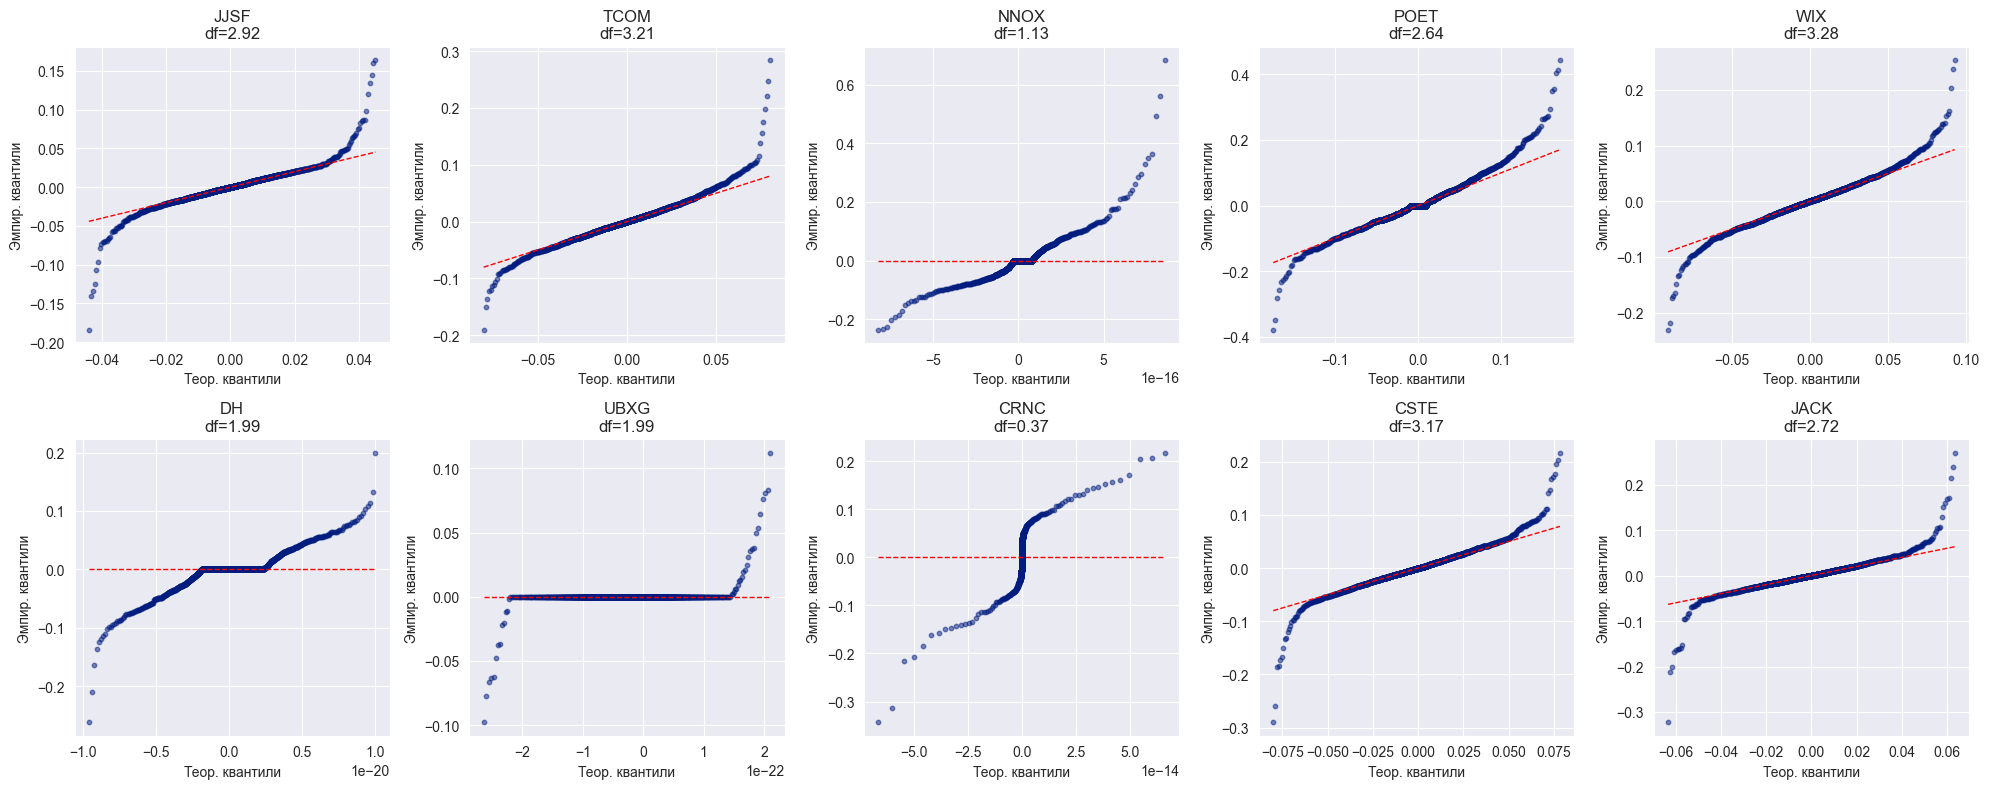

In [35]:

# Функция для построения Q-Q plot с t-распределением
def qq_plot_t(returns, ax, stock_name):
    # Подгонка t-распределения к данным
    df_t, loc_t, scale_t = t.fit(returns)
    
    # Вычисление теоретических квантилей t-распределения
    theoretical_quantiles = t.ppf(np.linspace(0.01, 0.99, len(returns)), df_t, loc_t, scale_t)
    
    # Сортировка данных для сравнения
    sorted_returns = np.sort(returns)
    
    # Построение Q-Q plot
    ax.scatter(theoretical_quantiles, sorted_returns, alpha=0.5, s=10)
    ax.plot([theoretical_quantiles.min(), theoretical_quantiles.max()],
            [theoretical_quantiles.min(), theoretical_quantiles.max()],
            color='red', linestyle='--', linewidth=1)
    
    ax.set_title(f'{stock_name}\ndf={df_t:.2f}')
    ax.set_xlabel('Теор. квантили')
    ax.set_ylabel('Эмпир. квантили')
    ax.grid(True)

# Выбор 10 случайных акций
random_stocks = np.random.choice(df_cleaned.columns, size=10, replace=False)

# Построение графиков
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Сетка 2x5
axes = axes.flatten()

for i, stock in enumerate(random_stocks):
    returns = df_cleaned[stock].dropna()
    if len(returns) > 10:  # Проверка, чтобы было достаточно данных для анализа
        qq_plot_t(returns, axes[i], stock)
    else:
        axes[i].set_title(f'{stock}\nНедостаточно данных')
        axes[i].axis('off')

plt.tight_layout()
plt.show()


Видим гораздо большее соответсвие! Тем не менее, есть исключения, например KYMR. Посмотрим поближе

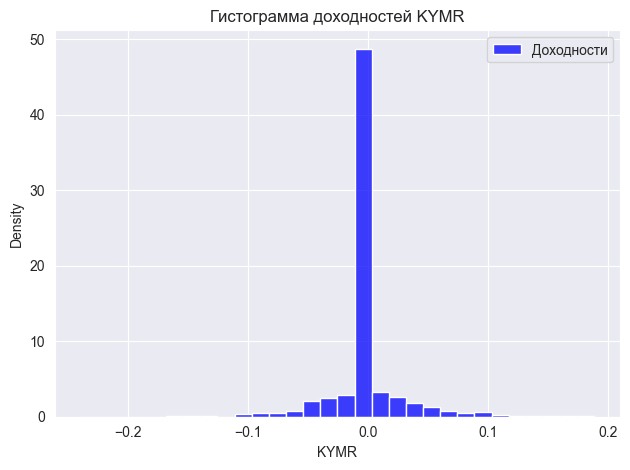

In [36]:

returns = df_cleaned['KYMR'].dropna()



# Гистограмма
sns.histplot(returns, kde=False, bins=30, stat='density', color='blue', label='Доходности')
plt.title('Гистограмма доходностей KYMR')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

Видим выброс в доходности, который портит картину. Без него распределение было бы похоже на стьюдента.

Таким образом мы выяснили, что доходность акций хорошо объясняется распределением стьюдента, но этому мешают выбросы в доходности, которые могут быть связаны со сплитом акций, или их консолидацией (стоимость акции резко падает/растет, от чего резко меняется доходность, получается выброс). Нормальное распределение плохо подходит под описание распределния доходностей из-за того, что у них зачастую тяжелые хвосты

# Есть ли связь динамики цен с датами?

В этом блоке попытаемся как-нибудь выявить связь между ценами и датами. Определим есть ли зависимость между динамикой цен и тем начало ли квартала/месяца или праздник. Попытаемся проанализировать связь в целом по всем акциям и может некоторым конкретным. Буду использовать методы из матстата6 которые нагуглил в инете. Ульянкин сказал, что норм, можно использовать.

In [37]:
df=df.set_index('date')
prices_df = df.loc[:, 'AACG':'ZYXI'] #оставляю только цены акций без инфы про S&P-500
df_r=(prices_df.diff()/prices_df.shift(1)).iloc[1:] # получили таблицу с доходностями
df_r

,AACG,AACI,AADI,AAGR,AAL,AAME,AAOI,AAON,AAPL,ABAT,...,ZOOZ,ZPTA,ZS,ZTEK,ZUMZ,ZURA,ZVRA,ZVSA,ZYME,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.0025,0.0000,0.0000,0.0000,0.0465,0.0226,-0.0191,-0.0003,-0.0220,0.0000,...,0.0000,0.0000,0.0000,0.0337,-0.0023,0.0000,0.0000,0.0000,0.0000,0.0000
2014-01-06,0.0025,0.0000,0.0000,0.0000,0.0185,-0.0098,-0.0014,-0.0161,0.0055,0.0000,...,0.0000,0.0000,0.0000,-0.0047,-0.0057,0.0000,0.0000,0.0000,0.0000,-0.0278
2014-01-07,0.0178,0.0000,0.0000,0.0000,-0.0044,0.0025,0.0286,0.0144,-0.0072,0.0000,...,0.0000,0.0000,0.0000,-0.0654,0.0231,0.0000,0.0000,0.0000,0.0000,0.0571
2014-01-08,0.0100,0.0000,0.0000,0.0000,0.0268,-0.0074,-0.0054,0.0044,0.0063,0.0000,...,0.0000,0.0000,0.0000,-0.0250,-0.0158,0.0000,0.0000,0.0000,0.0000,0.0541
2014-01-09,-0.0123,0.0000,0.0000,0.0000,0.0648,0.0050,-0.0341,-0.0060,-0.0128,0.0000,...,0.0000,0.0000,0.0000,-0.0308,-0.0756,0.0000,0.0000,0.0000,0.0000,-0.1282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,-0.0215,-0.0018,0.0408,0.0240,-0.0100,-0.0284,0.0200,-0.0127,0.0006,0.0153,...,-0.1269,-0.0700,-0.0100,0.0263,0.0165,0.1561,-0.0124,-0.0162,0.0251,-0.0009
2024-05-17,0.0000,0.0097,-0.0026,-0.0365,-0.0041,0.0000,0.0441,0.0003,0.0002,0.1353,...,0.0749,-0.0215,-0.0025,-0.0171,-0.0081,0.0083,-0.0063,-0.0767,-0.0277,-0.0109
2024-05-20,0.0000,-0.0052,-0.0262,-0.0676,-0.0143,-0.0409,0.0576,0.0013,0.0062,-0.0596,...,-0.0492,-0.0923,0.0097,0.0087,-0.0038,-0.0099,-0.0085,-0.0640,-0.0154,-0.0294


In [38]:
# добавляем столбцы c инфой о том, является ли день день началом месяца/квартала/празником
df_r['is_month_start'] = df_r.index.is_month_start
df_r['is_quarter_start'] = df_r.index.is_quarter_start
holidays = [ (1, 1), (12, 25), (7, 4), (10, 31) ] # да, больших американских празников с фиксированными датами не так много))
df_r['is_holiday'] = df_r.index.to_series().apply(lambda x: (x.month, x.day) in holidays)
df_r

,AACG,AACI,AADI,AAGR,AAL,AAME,AAOI,AAON,AAPL,ABAT,...,ZTEK,ZUMZ,ZURA,ZVRA,ZVSA,ZYME,ZYXI,is_month_start,is_quarter_start,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.0025,0.0000,0.0000,0.0000,0.0465,0.0226,-0.0191,-0.0003,-0.0220,0.0000,...,0.0337,-0.0023,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,False
2014-01-06,0.0025,0.0000,0.0000,0.0000,0.0185,-0.0098,-0.0014,-0.0161,0.0055,0.0000,...,-0.0047,-0.0057,0.0000,0.0000,0.0000,0.0000,-0.0278,False,False,False
2014-01-07,0.0178,0.0000,0.0000,0.0000,-0.0044,0.0025,0.0286,0.0144,-0.0072,0.0000,...,-0.0654,0.0231,0.0000,0.0000,0.0000,0.0000,0.0571,False,False,False
2014-01-08,0.0100,0.0000,0.0000,0.0000,0.0268,-0.0074,-0.0054,0.0044,0.0063,0.0000,...,-0.0250,-0.0158,0.0000,0.0000,0.0000,0.0000,0.0541,False,False,False
2014-01-09,-0.0123,0.0000,0.0000,0.0000,0.0648,0.0050,-0.0341,-0.0060,-0.0128,0.0000,...,-0.0308,-0.0756,0.0000,0.0000,0.0000,0.0000,-0.1282,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16,-0.0215,-0.0018,0.0408,0.0240,-0.0100,-0.0284,0.0200,-0.0127,0.0006,0.0153,...,0.0263,0.0165,0.1561,-0.0124,-0.0162,0.0251,-0.0009,False,False,False
2024-05-17,0.0000,0.0097,-0.0026,-0.0365,-0.0041,0.0000,0.0441,0.0003,0.0002,0.1353,...,-0.0171,-0.0081,0.0083,-0.0063,-0.0767,-0.0277,-0.0109,False,False,False
2024-05-20,0.0000,-0.0052,-0.0262,-0.0676,-0.0143,-0.0409,0.0576,0.0013,0.0062,-0.0596,...,0.0087,-0.0038,-0.0099,-0.0085,-0.0640,-0.0154,-0.0294,False,False,False


### Тест Манна-Уитни

Используется для сравнения двух групп, чтобы сравнить доходности в начале месяца и в остальные дни.
- Гипотезы:
  - ( H_0 ): Распределения двух групп одинаковы.
  - ( H_1 ): Распределения двух групп различаются.

In [39]:
from scipy.stats import mannwhitneyu

whitney_counter=0
# Пример: сравнение доходностей в начале месяца и в остальные дни
group1 = df_r[df_r['is_month_start']]  # Начало месяца
group2 = df_r[~df_r['is_month_start']]  # Остальные дни
# Проведение теста
for i in range(df_r.iloc[:,:3370].shape[1]):
    stat, p_value = mannwhitneyu(group1.iloc[:,i], group2.iloc[:,i], alternative='two-sided')
    if p_value < 0.05: # берем уровень значимости равный 0.05
        whitney_counter=whitney_counter+1
whitney_counter
print(f'\nВсего акций где p_value < 0.05: {whitney_counter} из {df_r.iloc[:,:3370].shape[1]}')


Всего акций где p_value < 0.05: 349 из 3370


Выходит, что мы отвергаем нулевую гипотезу о том, что выборки имеют одинаковое распредление в 349 случаях из 3370. Значит, что в 10% случаев в начале месяца доходности ведут себя по-другому, чем обычно. Это вполне может говорить о наличии зависимости

In [40]:
# Аналогично, но для кварталов

whitney_counter=0
# Пример: сравнение доходностей в начале месяца и в остальные дни
group1 = df_r[df_r['is_quarter_start']]  # Начало квартала
group2 = df_r[~df_r['is_quarter_start']]  # Остальные дни
# Проведение теста
for i in range(df_r.iloc[:,:3370].shape[1]):
    stat, p_value = mannwhitneyu(group1.iloc[:,i], group2.iloc[:,i], alternative='two-sided')
    if p_value < 0.05: # берем уровень значимости равный 0.05
        whitney_counter=whitney_counter+1
whitney_counter
print(f'\nВсего акций где p_value < 0.05: {whitney_counter} из {df_r.iloc[:,:3370].shape[1]}')


Всего акций где p_value < 0.05: 130 из 3370


Выходит, что мы отвергаем нулевую гипотезу о том, что выборки имеют одинаковое распредление в 130 случаях из 3370. Значит, что в 3% случаев в начале квартала доходности ведут себя по-другому, чем обычно. На наш взгляд этого мало, чтобы утверждать о реальной зависимости поведений инветоров от начала квартала.

In [41]:
# Аналогично, но для праздников
k=1000 # если взять больше, то код ложится и не хочет работать, так что ограничимся 1000 тикеров, они во фрейме по алфавиту, так что плюс минус рандомно по доходности и процент буде норм 
whitney_counter=0
# Пример: сравнение доходностей в начале месяца и в остальные дни
group1 = df_r[df_r['is_holiday']]  # Начало празника
group2 = df_r[~df_r['is_holiday']]  # Остальные дни
# Проведение теста
for i in range(df_r.iloc[:,:k].shape[1]):
    stat, p_value = mannwhitneyu(group1.iloc[:,i], group2.iloc[:,i], alternative='two-sided')
    if p_value < 0.05: # берем уровень значимости равный 0.05
        whitney_counter=whitney_counter+1
whitney_counter
print(f'\nВсего акций где p_value < 0.05: {whitney_counter} из {df_r.iloc[:,:k].shape[1]}')


Всего акций где p_value < 0.05: 40 из 1000


Выходит, что мы отвергаем нулевую гипотезу о том, что выборки имеют одинаковое распредление в 40 случаях из 1000. Значит, что в 4% случаев в начале квартала доходности ведут себя по-другому, чем обычно. На наш взгляд этого мало, чтобы утверждать о реальной зависимости поведений инветоров от начала квартала.

### Тест Уилкоксона

Используется для сравнения двух связанных групп, чтобы сравнить доходности до и после начала месяца.
- Гипотезы:
  - ( H_0 ): Распределения двух групп одинаковы.
  - ( H_1 ): Распределения двух групп различаются.

In [42]:

from scipy.stats import wilcoxon
wilcoxon_counter=0

group1 = df_r[df_r['is_month_start']]  # Начало месяца
group2 = df_r[df_r['is_month_start'].shift(1, fill_value=False)]  # день до
# Проведение теста
for i in range(df_r.iloc[:,:3370].shape[1]):
    stat, p_value = wilcoxon(group1.iloc[:, i], group2.iloc[:, i], zero_method='zsplit')
    if p_value < 0.05: # берем уровень значимости равный 0.05
            wilcoxon_counter=wilcoxon_counter+1
wilcoxon_counter
print(f'\nВсего акций где p_value < 0.05: {wilcoxon_counter} из {df_r.iloc[:,:3370].shape[1]}')


Всего акций где p_value < 0.05: 144 из 3370


Выходит, что мы отвергаем нулевую гипотезу о том, что выборки имеют одинаковое распредление в 144 случаях из 3370. Значит, что в 4% случаев в начале месяца доходности ведут себя по-другому, чем за день до. На наш взгляд этого мало, чтобы утверждать о реальной зависимости поведений инветоров от начала месяца.

In [43]:
# Аналогично, но для кварталов
from scipy.stats import wilcoxon
wilcoxon_counter=0

group1 = df_r[df_r['is_quarter_start']]  # Начало квартала
group2 = df_r[df_r['is_quarter_start'].shift(1, fill_value=False)]  # день до
# Проведение теста
for i in range(df_r.iloc[:,:3370].shape[1]):
    stat, p_value = wilcoxon(group1.iloc[:, i], group2.iloc[:, i], zero_method='zsplit')
    if p_value < 0.05: # берем уровень значимости равный 0.05
            wilcoxon_counter=wilcoxon_counter+1
wilcoxon_counter
print(f'\nВсего акций где p_value < 0.05: {wilcoxon_counter} из {df_r.iloc[:,:3370].shape[1]}')


Всего акций где p_value < 0.05: 79 из 3370


Выходит, что мы отвергаем нулевую гипотезу о том, что выборки имеют одинаковое распредление в 79 случаях из 3370. Значит, что в 2% случаев в начале квартала доходности ведут себя по-другому, чем за день до. На наш взгляд этого мало, чтобы утверждать о реальной зависимости поведений инветоров от начала квартала.

In [44]:
# Аналогично, но для праздников
from scipy.stats import wilcoxon
wilcoxon_counter=0

group1 = df_r[df_r['is_holiday']]  # праздник
group2 = df_r[df_r['is_holiday'].shift(1, fill_value=False)]  # день до
# Проведение теста
for i in range(df_r.iloc[:,:3370].shape[1]):
    stat, p_value = wilcoxon(group1.iloc[:, i], group2.iloc[:, i], zero_method='zsplit')
    if p_value < 0.05: # берем уровень значимости равный 0.05
            wilcoxon_counter=wilcoxon_counter+1
wilcoxon_counter
print(f'\nВсего акций где p_value < 0.05: {wilcoxon_counter} из {df_r.iloc[:,:3370].shape[1]}')


Всего акций где p_value < 0.05: 65 из 3370


Выходит, что мы отвергаем нулевую гипотезу о том, что выборки имеют одинаковое распредление в 65 случаях из 3370. Значит, что в 2% случаев в праздники доходности ведут себя по-другому, чем за день до. На наш взгляд этого мало, чтобы утверждать о реальной зависимости поведений инветоров от праздников.

In [45]:
# Преобразование в длинный формат
df_long = df_r.reset_index().melt(id_vars=['date', 'is_month_start', 'is_quarter_start', 'is_holiday'], var_name='Ticker', value_name='Return')
df_long = df_long.rename(columns={'index': 'date'})
df_long

,date,is_month_start,is_quarter_start,is_holiday,Ticker,Return
0,2014-01-03,False,False,False,AACG,-0.0025
1,2014-01-06,False,False,False,AACG,0.0025
2,2014-01-07,False,False,False,AACG,0.0178
3,2014-01-08,False,False,False,AACG,0.0100
4,2014-01-09,False,False,False,AACG,-0.0123
...,...,...,...,...,...,...
8809175,2024-05-16,False,False,False,ZYXI,-0.0009
8809176,2024-05-17,False,False,False,ZYXI,-0.0109
8809177,2024-05-20,False,False,False,ZYXI,-0.0294
8809178,2024-05-21,False,False,False,ZYXI,0.0019


чуть подробнее рассмотрим зависомость от начала месяца, так как она дала наилучщие значения.

In [46]:
print(df_r[df_r['is_month_start']].mean().mean()/df_r.mean().mean())

1.3481774918794787


Если же брать просто средние за все время по всем тикерам, то можно видеть, что в начале месяца в среднем доходность больше на 34%

In [47]:
import random

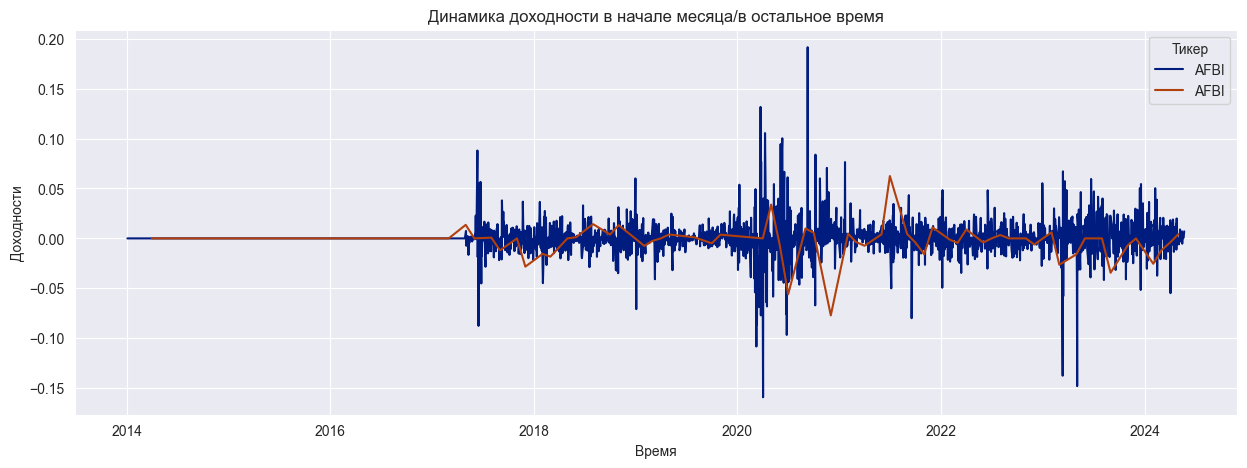

In [48]:
# Динамика доходности одной акции в начале месяца и в остальное время
random.seed(1027)
t = random.sample(list(df_r.columns), 1) 

plt.figure(figsize=(15, 5))
for i in t:
    # Фильтруем данные по началу месяца
    month_start_data = df_r[~df_r['is_month_start'] == 1]
    
    # Строим график для каждого тикера
    plt.plot(month_start_data.index, month_start_data[i], label=i)
    
for i in t:
    # Фильтруем данные по началу месяца
    month_start_data = df_r[df_r['is_month_start'] == 1]
    
    # Строим график для каждого тикера
    plt.plot(month_start_data.index, month_start_data[i], label=i)
plt.title('Динамика доходности в начале месяца/в остальное время')
plt.xlabel('Время')
plt.ylabel('Доходности')
plt.legend(title='Тикер')


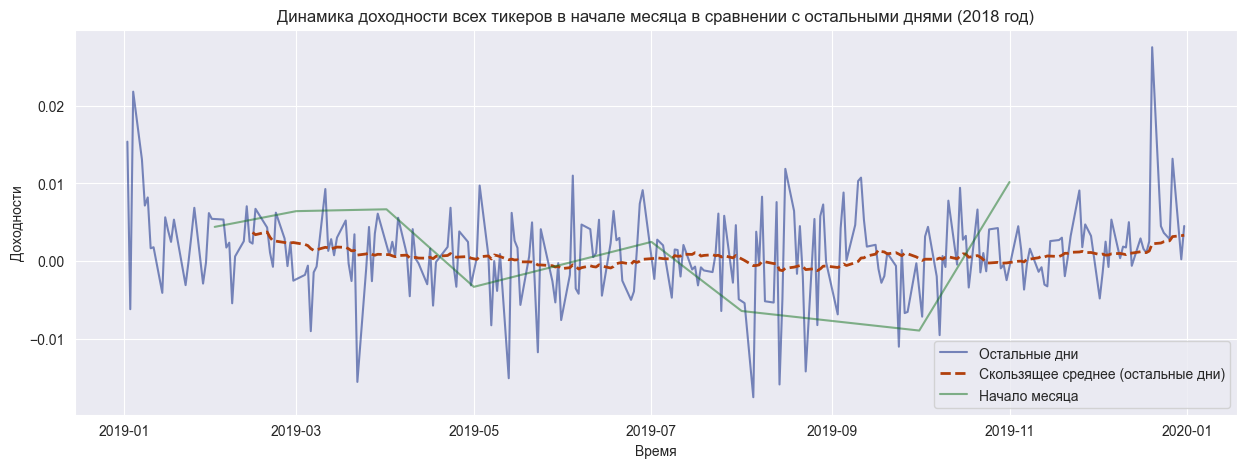

In [49]:
god=2019
# Фильтрация данных для 2018 года и не начала месяца
month_start_data_0 = df_r[(df_r['is_month_start'] == 0) & (df_r.index.year == god)].T.mean()

# Фильтрация данных для 2018 года и начала месяца
month_start_data_1 = df_r[(df_r['is_month_start'] == 1) & (df_r.index.year == god)].T.mean()

# Расчет скользящего среднего (например, за 30 дней)
window_size = 30  # Размер окна для скользящего среднего
rolling_mean_0 = month_start_data_0.rolling(window=window_size).mean()
rolling_mean_1 = month_start_data_1.rolling(window=window_size).mean()

# Построение графиков
plt.figure(figsize=(15, 5))

# График доходности для всех дней, кроме начала месяца
plt.plot(month_start_data_0.index, month_start_data_0, label='Остальные дни', alpha=0.5)
plt.plot(rolling_mean_0.index, rolling_mean_0, label='Скользящее среднее (остальные дни)', linestyle='--', linewidth=2)

# График доходности для начала месяца
plt.plot(month_start_data_1.index, month_start_data_1, label='Начало месяца', alpha=0.5)

# Настройка графика
plt.title('Динамика доходности всех тикеров в начале месяца в сравнении с остальными днями (2018 год)')
plt.xlabel('Время')
plt.ylabel('Доходности')
plt.legend()
plt.grid(True)
plt.show()

Здесь в целом видно, что начало месяца не особо коррелирует со средней за все время. На графике я вывел только один год, так как так видно лучше, но если брать другие года, то картина особо не меняется. Нету такого что зеленая линия стабильно выше красной, значит особого обгона доходности в первые дни по сравнению с остальными не видно, если она вооще есть.


Как итог, можно заключить что по датам доходность особо никак не выделяется и календарно не зависит от начала месяца/квартала/праздника.